In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'E:\Data Science\Projects\ML\COVID19 Global Forecasting (Week 5)\data\train.csv')
data.head()

E:\Data Science\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [3]:
test = pd.read_csv(r'E:\Data Science\Projects\ML\COVID19 Global Forecasting (Week 5)\data\test.csv')
test.head()

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


In [4]:
col_wth_na = [col for col in data.columns if data[col].isnull().any()] 
max_na = pd.Series([data[i].isnull().sum() for i in col_wth_na], index = col_wth_na)
max_na.sort_values(ascending = False)

County            89600
Province_State    52360
dtype: int64

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
data['Country_Region'] = le.fit_transform(data['Country_Region'])

In [30]:
test['Country_Region'] = le.fit_transform(test['Country_Region'])

In [7]:
data['Target'] = le.fit_transform(data['Target'])

In [31]:
test['Target'] = le.fit_transform(test['Target'])

In [8]:
data.Date = pd.to_datetime(data.Date)

In [32]:
test.Date = pd.to_datetime(test.Date)

In [9]:
data['Day'] = data.Date.dt.day
data['Week'] = data.Date.dt.week 
data['Year'] = data.Date.dt.year

In [33]:
test['Day'] = test.Date.dt.day
test['Week'] = test.Date.dt.week 
test['Year'] = test.Date.dt.year

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Id              969640 non-null  int64         
 1   County          880040 non-null  object        
 2   Province_State  917280 non-null  object        
 3   Country_Region  969640 non-null  int32         
 4   Population      969640 non-null  int64         
 5   Weight          969640 non-null  float64       
 6   Date            969640 non-null  datetime64[ns]
 7   Target          969640 non-null  int32         
 8   TargetValue     969640 non-null  int64         
 9   Day             969640 non-null  int64         
 10  Week            969640 non-null  int64         
 11  Year            969640 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(6), object(2)
memory usage: 81.4+ MB


In [11]:
corr_matrix = data.corr()
corr_matrix['TargetValue'].sort_values(ascending=False)

TargetValue       1.000000
Population        0.161230
Week              0.030254
Day              -0.001712
Id               -0.015123
Target           -0.037075
Weight           -0.040699
Country_Region   -0.047520
Year                   NaN
Name: TargetValue, dtype: float64

In [12]:
X = data.drop(['TargetValue', 'County', 'Province_State', 'Date'], axis = 1)
y = data['TargetValue']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [16]:
# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state = 0)
regr.fit(X_train, y_train)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 3, n_estimators=200)
adaregr.fit(X_train, y_train)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor_dt.fit(X_train,y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=25)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=25, random_state=0)

In [17]:
y_pred1 = regr.predict(X_test)                # XGBoost
y_pred2 = adaregr.predict(X_test)             # AdaBoost
y_pred3 = regressor_dt.predict(X_test)        # Decision Tree
y_pred4 = regr_rf.predict(X_test)             # Random Forests

In [18]:
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Random Forests Regressor is  :', round((r2_score(y_test, y_pred4)), 3))

The R^2 value for XGBoost Regressor is: 0.949
The R^2 value for AdaBoost Regressor is: -6.132
The R^2 value for Decision Tree Regressor is: 0.925
The R^2 value for Random Forests Regressor is  : 0.96


In [20]:
print('The Adj R2 value for XGBoost Regressor is:', round((1 - (1 - r2_score(y_test, y_pred1)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is:', round((1 - (1 - r2_score(y_test, y_pred2)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is:', round((1 - (1 - r2_score(y_test, y_pred3)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is:', round((1 - (1 - r2_score(y_test, y_pred4)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))

The Adj R2 value for XGBoost Regressor is: 0.949
The Adj R2 value for AdaBoost Regressor is: -6.133
The Adj R2 value for Decision Tree Regressor is: 0.925
The Adj R2 value for Random Forests Regressor is: 0.96


In [21]:
MSE_xgb = mean_squared_error(y_test,y_pred1)
MSE_ada = mean_squared_error(y_test,y_pred2)
MSE_dt  = mean_squared_error(y_test,y_pred3)
MSE_rf  = mean_squared_error(y_test,y_pred4)

In [22]:
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for XGBoost Regressor is        : 75.0
The RMSE value for AdaBoost Regressor is       : 886.0
The RMSE value for Decision Tree Regressor is  : 91.0
The RMSE value for Random Forests Regressor is : 66.0


Text(0.5, 1.0, 'Xgboost')

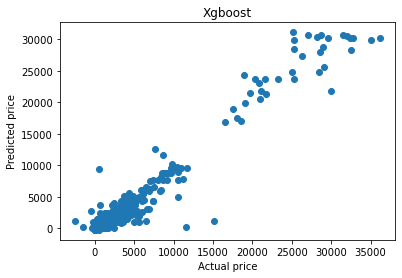

In [24]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

Text(0.5, 1.0, 'Adaboost')

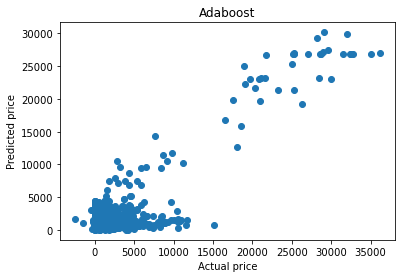

In [26]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

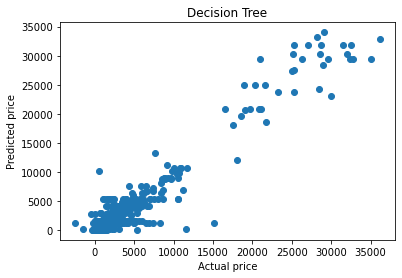

In [27]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Decision Tree")

Text(0.5, 1.0, 'Random Forest')

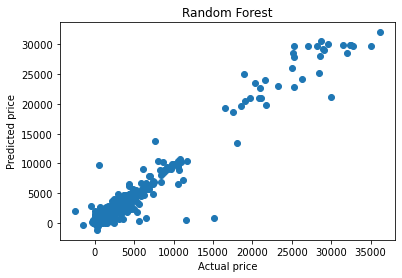

In [28]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Random Forest")

In [35]:
result = regr_rf.predict(test.drop(['County', 'Province_State', 'Date'], axis = 1))             # Random Forests

In [39]:
result_data = pd.DataFrame(result, index = test['ForecastId'])

In [40]:
result_data

,0
ForecastId,
1,115.910378
2,5.374602
3,115.910378
4,5.374602
5,115.910378
...,...
311666,80.128289
311667,808.750081
311668,80.128289
